In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

class HyperParams:
    pass
hyperparams = HyperParams()

hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 500
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
MODEL_NAME = "0100_1000-64-aeconnect-xxe4"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

from tensorflow.keras.optimizers import Adam
hyperparams.OPTIMIZER = Adam(0.0005,beta_1=0.9)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelD as train
import ReportsK as reports
import AEConnectionsF as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 64, 64, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   18496       leaky_re_lu[0][0]                
______________________________________________________________________________________________

{'name': 'Adam',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
            dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
            dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:8738
Nitid files:8738
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2208
Nitid files:2208


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)


checkpoint_filepath = os.path.abspath(os.path.join('../../../saves/') + MODEL_NAME \
                                      + "_checkpoint_" + '_weights_{epoch:02d}-{val_loss:.2f}')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 50, \
                 callbacks=[model_checkpoint_callback] )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/500
274/274 [==============================] - 14s 27ms/step - loss: 0.0445 - val_loss: 0.0438
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-aeconnect-xxe4_checkpoint__weights_01-0.04\assets
Epoch 2/500
  1/274 [..............................] - ETA: 20s - loss: 0.0391

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 7s 27ms/step - loss: 0.0294 - val_loss: 0.0253
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-aeconnect-xxe4_checkpoint__weights_02-0.03\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0278 - val_loss: 0.0237
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-aeconnect-xxe4_checkpoint__weights_03-0.02\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0270 - val_loss: 0.0223
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-aeconnect-xxe4_checkpoint__weights_04-0.02\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0264 - val_loss: 0.0263
Epoch 6/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0258 - val_loss: 0.0228
Epoch 7/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0254 - val_loss: 0.0226
Epoch 8/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0250 - val_loss: 0.0250
Epoch 9/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0243 - val_loss: 0.0218
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-aeconnect-xxe4_checkpoint__weights_09-0.02\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 10/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0243 - val_loss: 0.0238
Epoch 11/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0241 - val_loss: 0.0214
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-aeconnect-xxe4_checkpoint__weights_11-0.02\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 12/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0241 - val_loss: 0.0218
Epoch 13/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0234 - val_loss: 0.0218
Epoch 14/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0234 - val_loss: 0.0233
Epoch 15/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0228 - val_loss: 0.0205
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-aeconnect-xxe4_checkpoint__weights_15-0.02\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 16/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0224 - val_loss: 0.0203
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-aeconnect-xxe4_checkpoint__weights_16-0.02\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 17/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0223 - val_loss: 0.0220
Epoch 18/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0222 - val_loss: 0.0212
Epoch 19/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0222 - val_loss: 0.0217
Epoch 20/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0219 - val_loss: 0.0205
Epoch 21/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0216 - val_loss: 0.0227
Epoch 22/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0216 - val_loss: 0.0257
Epoch 23/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0228 - val_loss: 0.0204
Epoch 24/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0212 - val_loss: 0.0208
Epoch 25/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0210 - val_loss: 0.0206
Epoch 26/500
274/274 [==============================] - 7s 26ms/step - lo

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 27/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0202 - val_loss: 0.0197
Epoch 28/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0203 - val_loss: 0.0262
Epoch 29/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0202 - val_loss: 0.0193
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-aeconnect-xxe4_checkpoint__weights_29-0.02\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 30/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0201 - val_loss: 0.0196
Epoch 31/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0204 - val_loss: 0.0197
Epoch 32/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0198 - val_loss: 0.0205
Epoch 33/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0198 - val_loss: 0.0197
Epoch 34/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0194 - val_loss: 0.0206
Epoch 35/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0194 - val_loss: 0.0224
Epoch 36/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0194 - val_loss: 0.0193
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-aeconnect-xxe4_checkpoint__weights_36-0.02\assets
Epoch 37/500
  1/274 [..............................] - ETA: 30s - loss: 0.0240

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


274/274 [==============================] - 7s 27ms/step - loss: 0.0191 - val_loss: 0.0205
Epoch 38/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0192 - val_loss: 0.0201
Epoch 39/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0188 - val_loss: 0.0209
Epoch 40/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0187 - val_loss: 0.0216
Epoch 41/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0199 - val_loss: 0.0206
Epoch 42/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0187 - val_loss: 0.0198
Epoch 43/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0184 - val_loss: 0.0209
Epoch 44/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0186 - val_loss: 0.0199
Epoch 45/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0182 - val_loss: 0.0201
Epoch 46/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0181 - 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 65/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0163 - val_loss: 0.0192
Epoch 66/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0157 - val_loss: 0.0197
Epoch 67/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0160 - val_loss: 0.0199
Epoch 68/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0156 - val_loss: 0.0197
Epoch 69/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0157 - val_loss: 0.0201
Epoch 70/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0154 - val_loss: 0.0238
Epoch 71/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0161 - val_loss: 0.0200
Epoch 72/500
274/274 [==============================] - 7s 26ms/step - loss: 0.0152 - val_loss: 0.0192
Epoch 73/500
274/274 [==============================] - 7s 25ms/step - loss: 0.0150 - val_loss: 0.0234
Epoch 74/500
274/274 [==============================] - 7s 26ms/step - lo

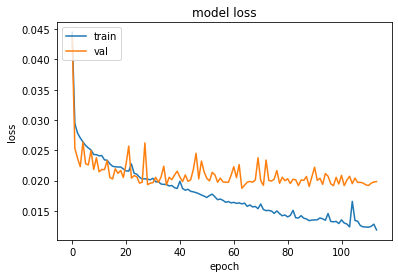

Best Epoch:64


In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =2208
Best RMSENZ  =2045 (0.93)
Best MAENZ   =2043 (0.93)
Best PSNR    =2045 (0.93)
Best Accuracy=1948 (0.88)
RMSE-NZ  Pred=0.0224  Noisy=0.0943
MAE-NZ   Pred=0.0187  Noisy=0.0903
PSNR     Pred=20.9 dB Noisy=9.4 dB
Accuracy Pred=0.43    Noisy=0.09
SSM      Pred=0.95    Noisy=0.63
HOG MSE  Pred=0.09    Noisy=0.12


In [9]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-aeconnect-xxe4\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [10]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test/
Noisy files:19
Nitid files:19
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_12_nitid_idx134.tif


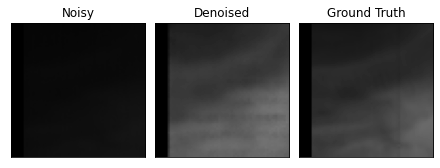

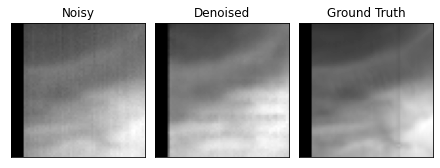

RMSE-NZ  Pred=0.0693  Noisy=0.1722 BEST
MAE-NZ   Pred=0.0621  Noisy=0.1588 BEST
PSNR     Pred=15.6 dB Noisy=7.7 dB BEST
Accuracy Pred=0.10    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.29
HOG MSE  Pred=0.03    Noisy=0.04
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_13_nitid_idx134.tif


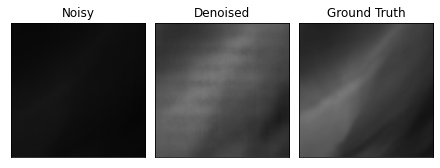

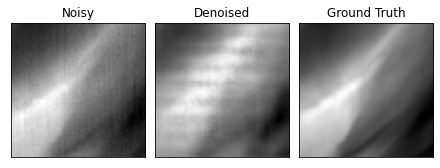

RMSE-NZ  Pred=0.0663  Noisy=0.2105 BEST
MAE-NZ   Pred=0.0597  Noisy=0.1954 BEST
PSNR     Pred=17.0 dB Noisy=6.9 dB BEST
Accuracy Pred=0.08    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.29
HOG MSE  Pred=0.14    Noisy=0.13
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_14_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_14_nitid_idx134.tif


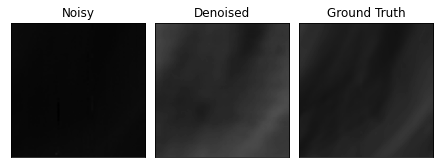

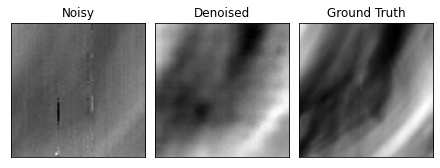

RMSE-NZ  Pred=0.0597  Noisy=0.0994 BEST
MAE-NZ   Pred=0.0572  Noisy=0.0953 BEST
PSNR     Pred=11.4 dB Noisy=7.0 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.32
HOG MSE  Pred=0.08    Noisy=0.16
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_00_0_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_00_0_nitid_idx017.tif


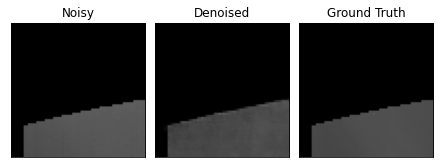

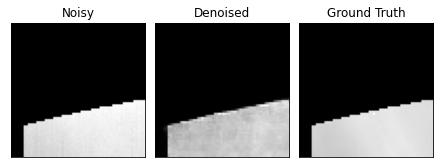

RMSE-NZ  Pred=0.0154  Noisy=0.0388 BEST
MAE-NZ   Pred=0.0059  Noisy=0.0376 BEST
PSNR     Pred=27.0 dB Noisy=19.0 dB BEST
Accuracy Pred=0.79    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.96
HOG MSE  Pred=0.20    Noisy=0.07
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_01_4_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_01_4_nitid_idx017.tif


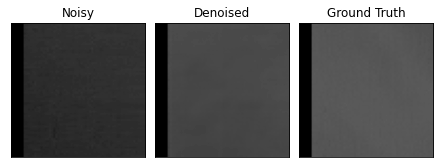

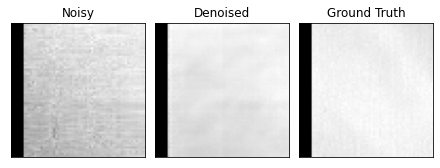

RMSE-NZ  Pred=0.0590  Noisy=0.1632 BEST
MAE-NZ   Pred=0.0545  Noisy=0.1622 BEST
PSNR     Pred=15.7 dB Noisy=6.9 dB BEST
Accuracy Pred=0.09    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.86
HOG MSE  Pred=0.00    Noisy=0.01
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_02_12_nitid_idx134.tif


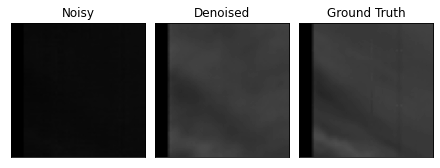

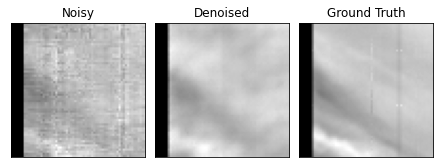

RMSE-NZ  Pred=0.0104  Noisy=0.1870 BEST
MAE-NZ   Pred=0.0072  Noisy=0.1854 BEST
PSNR     Pred=29.3 dB Noisy=4.2 dB BEST
Accuracy Pred=0.75    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.30
HOG MSE  Pred=0.03    Noisy=0.03
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_4_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_4_nitid_idx134.tif


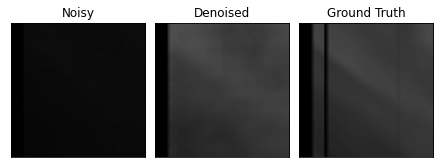

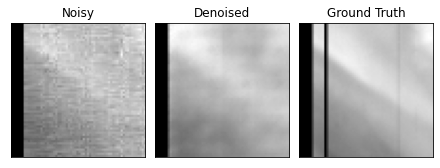

RMSE-NZ  Pred=0.0345  Noisy=0.1704 BEST
MAE-NZ   Pred=0.0164  Noisy=0.1661 BEST
PSNR     Pred=18.5 dB Noisy=4.6 dB BEST
Accuracy Pred=0.51    Noisy=0.00 BEST
SSM      Pred=0.88    Noisy=0.31
HOG MSE  Pred=0.03    Noisy=0.07
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_5_nitid_idx134.tif


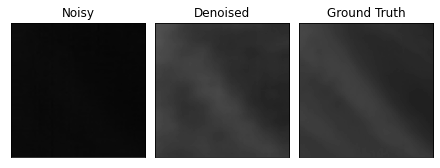

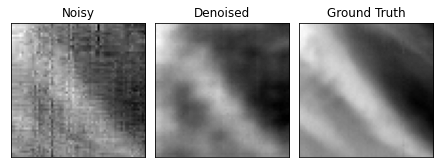

RMSE-NZ  Pred=0.0163  Noisy=0.1649 BEST
MAE-NZ   Pred=0.0137  Noisy=0.1619 BEST
PSNR     Pred=24.7 dB Noisy=4.6 dB BEST
Accuracy Pred=0.36    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.32
HOG MSE  Pred=0.09    Noisy=0.35
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_03_02_10_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_03_02_10_nitid_idx134.tif


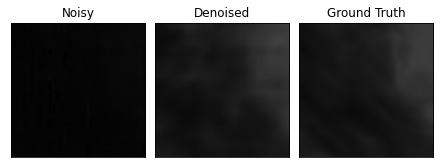

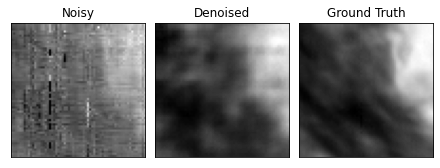

RMSE-NZ  Pred=0.0124  Noisy=0.0964 BEST
MAE-NZ   Pred=0.0100  Noisy=0.0856 BEST
PSNR     Pred=25.7 dB Noisy=7.9 dB BEST
Accuracy Pred=0.57    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.38
HOG MSE  Pred=0.07    Noisy=0.20
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_03_14_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_03_14_nitid_idx146.tif


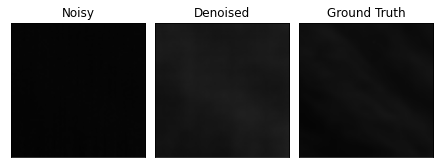

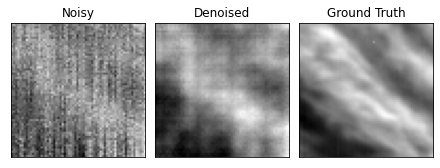

RMSE-NZ  Pred=0.0389  Noisy=0.0368 WORST
MAE-NZ   Pred=0.0382  Noisy=0.0345 WORST
PSNR     Pred=6.9 dB Noisy=7.3 dB WORST
Accuracy Pred=0.00    Noisy=0.05 WORST
SSM      Pred=0.85    Noisy=0.43
HOG MSE  Pred=0.13    Noisy=0.22
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_01_12_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_01_12_nitid_idx017.tif


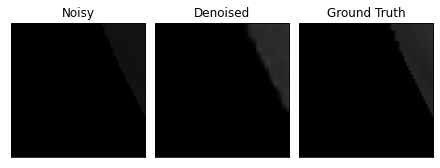

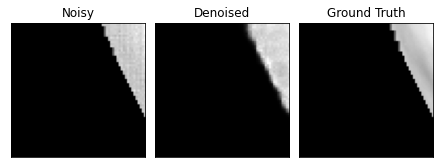

RMSE-NZ  Pred=0.0120  Noisy=0.0366 BEST
MAE-NZ   Pred=0.0037  Noisy=0.0184 BEST
PSNR     Pred=23.7 dB Noisy=14.0 dB BEST
Accuracy Pred=0.89    Noisy=0.74 BEST
SSM      Pred=0.98    Noisy=0.92
HOG MSE  Pred=0.11    Noisy=0.02
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_02_5_nitid_idx134.tif


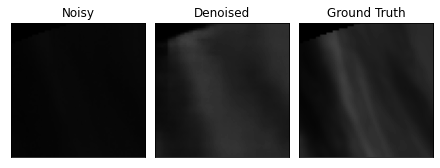

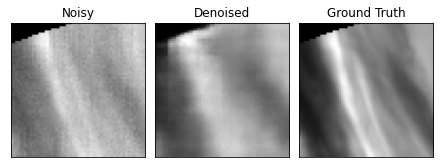

RMSE-NZ  Pred=0.0216  Noisy=0.1089 BEST
MAE-NZ   Pred=0.0175  Noisy=0.0979 BEST
PSNR     Pred=21.4 dB Noisy=7.3 dB BEST
Accuracy Pred=0.30    Noisy=0.01 BEST
SSM      Pred=0.89    Noisy=0.36
HOG MSE  Pred=0.10    Noisy=0.13
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0343_03_01_8_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0343_03_01_8_nitid_idx017.tif


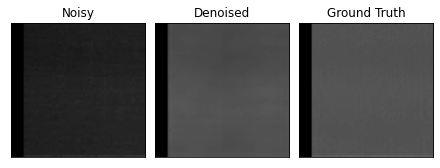

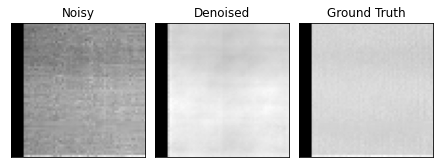

RMSE-NZ  Pred=0.0220  Noisy=0.1952 BEST
MAE-NZ   Pred=0.0169  Noisy=0.1947 BEST
PSNR     Pred=25.0 dB Noisy=6.0 dB BEST
Accuracy Pred=0.41    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.65
HOG MSE  Pred=0.01    Noisy=0.02
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_11_nitid_idx134.tif


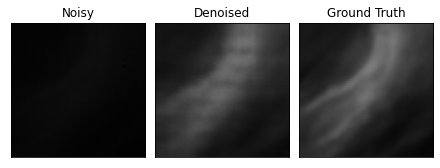

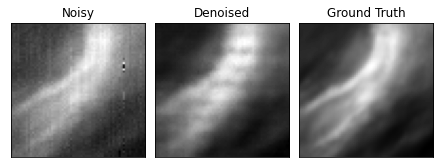

RMSE-NZ  Pred=0.0215  Noisy=0.1931 BEST
MAE-NZ   Pred=0.0163  Noisy=0.1660 BEST
PSNR     Pred=27.0 dB Noisy=8.0 dB BEST
Accuracy Pred=0.39    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.26
HOG MSE  Pred=0.04    Noisy=0.09
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_12_nitid_idx134.tif


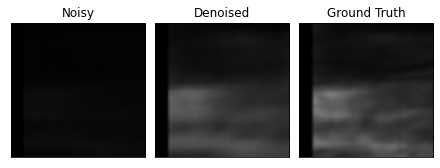

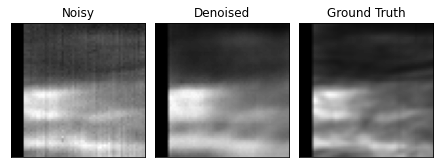

RMSE-NZ  Pred=0.0265  Noisy=0.1742 BEST
MAE-NZ   Pred=0.0171  Noisy=0.1438 BEST
PSNR     Pred=25.5 dB Noisy=9.1 dB BEST
Accuracy Pred=0.50    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.36
HOG MSE  Pred=0.01    Noisy=0.05
******************************************************
Index:15
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_13_nitid_idx134.tif


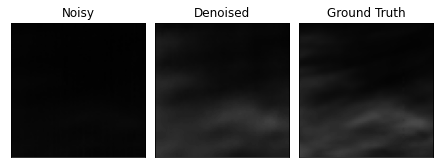

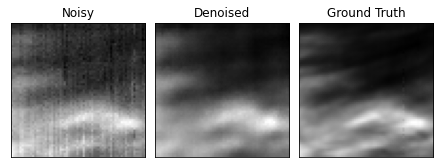

RMSE-NZ  Pred=0.0159  Noisy=0.0979 BEST
MAE-NZ   Pred=0.0123  Noisy=0.0772 BEST
PSNR     Pred=25.2 dB Noisy=9.4 dB BEST
Accuracy Pred=0.49    Noisy=0.04 BEST
SSM      Pred=0.95    Noisy=0.41
HOG MSE  Pred=0.04    Noisy=0.12
******************************************************
Index:16
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_11_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_11_nitid_idx146.tif


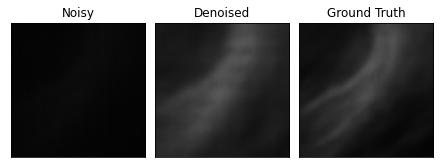

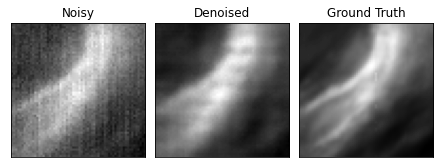

RMSE-NZ  Pred=0.0399  Noisy=0.1221 BEST
MAE-NZ   Pred=0.0356  Noisy=0.1019 BEST
PSNR     Pred=18.5 dB Noisy=8.8 dB BEST
Accuracy Pred=0.08    Noisy=0.02 BEST
SSM      Pred=0.88    Noisy=0.29
HOG MSE  Pred=0.05    Noisy=0.14
******************************************************
Index:17
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_8_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_8_nitid_idx146.tif


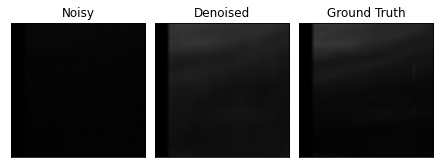

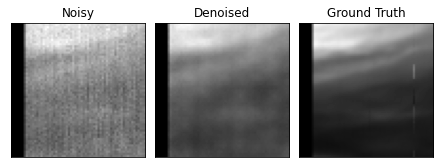

RMSE-NZ  Pred=0.0262  Noisy=0.0710 BEST
MAE-NZ   Pred=0.0229  Noisy=0.0512 BEST
PSNR     Pred=18.6 dB Noisy=10.0 dB BEST
Accuracy Pred=0.20    Noisy=0.21 WORST
SSM      Pred=0.85    Noisy=0.41
HOG MSE  Pred=0.07    Noisy=0.10
******************************************************
Index:18
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_0_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_0_nitid_idx134.tif


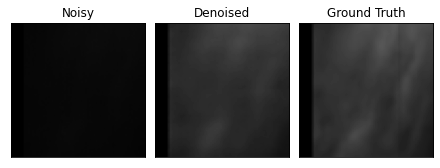

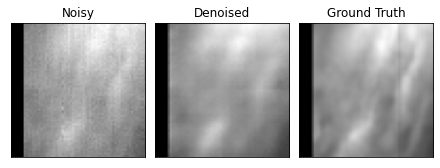

RMSE-NZ  Pred=0.0336  Noisy=0.1835 BEST
MAE-NZ   Pred=0.0297  Noisy=0.1780 BEST
PSNR     Pred=20.2 dB Noisy=5.5 dB BEST
Accuracy Pred=0.13    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.31
HOG MSE  Pred=0.02    Noisy=0.03
******************************************************


In [11]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
                dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
                dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )